## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Read the data into the notebook

In [2]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")  # importing the dataset 

In [3]:
df.head() # checking the dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Basic EDA
* Find the shape of the data,data type of individual columns
* Check the presence of missing values
* Descriptive stats of numerical columns
* Find the distribution of numerical columns and the asssociated skeweness and presence of outliers

In [4]:
df.shape #checking the shape of the dataset

(5000, 14)

In [5]:
df.info()   # full information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### - The data has 5000 instances with 14 attributes. 13 integer type, 1 float type and no object type

In [6]:
df.isna().apply(pd.value_counts)   #null value check

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
False,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


### - There are no null values in any of the column

In [7]:
df.duplicated().any() # checking if there any duplicate values  (after checking found out that  we don't have any dupplicates)

False

### - There are no duplicate values in any of the column

In [8]:
df.drop('ID',1,inplace=True) #dropping the ID column as it is not significant

 ## 1.Read the column description and ensure you understand each attribute well

In [9]:
# five point summary of the all the attributes
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


### - Looking at the age column, data looks representative of the true age distribution of the adult population
### - Mortgage column is higly skewed as large number of zeros are there. (Seems only few people are opted for mortage)
### - Looking at the Education column 25% of the customers are Undergrad(1) and 50% are Graduate(2) and 75% are Advanced/Professional(3)
### - More than 50% of the customers use internet banking facility 
### - Family is uniformly distributed
### - In Experience column we have an outlier i.e. minimum experience is negative number i.e.(-3) , person should be zero or more experience
### - Less than 75% of the customers not accepted the personal loan in the last campaign 

In [10]:
df['Experience'] = df['Experience'].replace({-3:0, -1:0 ,-2:0})  #replacing all the negative values in experience to zero

## 2. Study the data distribution in each attribute, share your findings (15 marks)

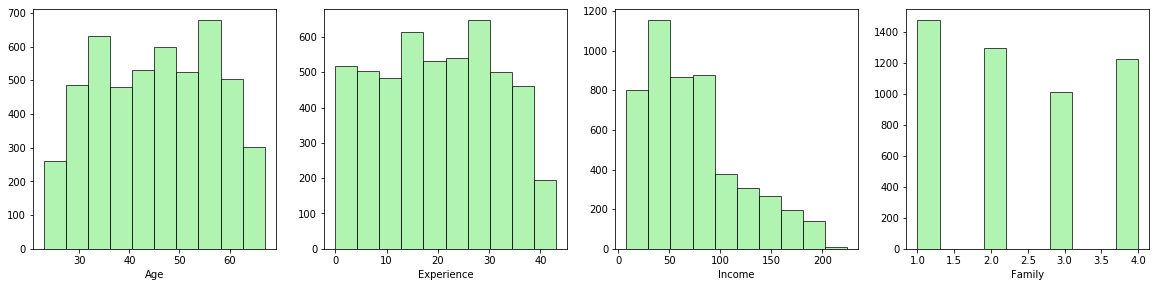

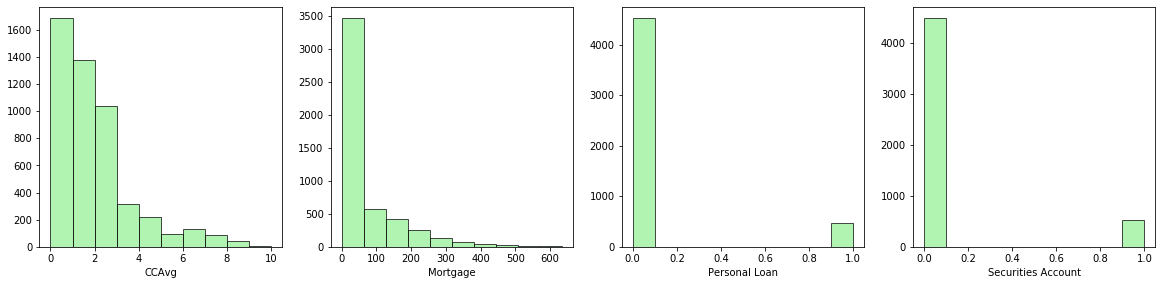

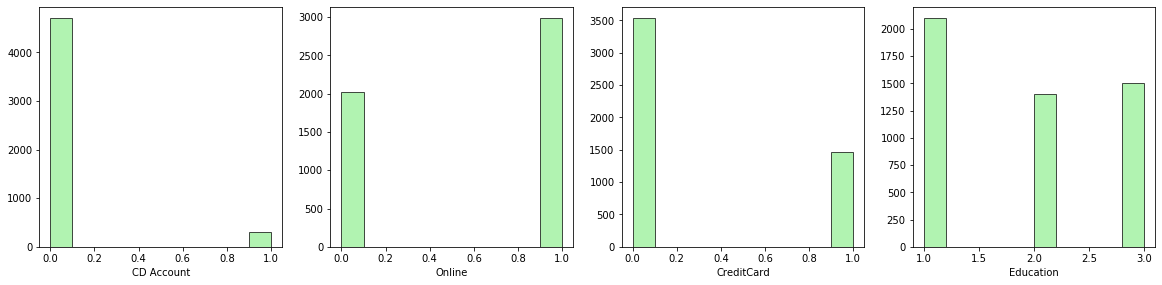

In [11]:
#Plots to see the distribution of the continuous features individually

plt.figure(figsize= (20,15))
plt.subplot(3,4,1)
plt.hist(df.Age, color='lightgreen', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Age')

plt.subplot(3,4,2)
plt.hist(df.Experience, color='lightgreen', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Experience')

plt.subplot(3,4,3)
plt.hist(df.Income, color='lightgreen', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Income')

plt.subplot(3,4,4)
plt.hist(df.Family, color='lightgreen', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Family')

plt.figure(figsize= (20,15))
plt.subplot(3,4,1)
plt.hist(df.CCAvg, color='lightgreen', edgecolor = 'black', alpha = 0.7)
plt.xlabel('CCAvg')

plt.subplot(3,4,2)
plt.hist(df.Mortgage, color='lightgreen', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Mortgage')

plt.subplot(3,4,3)
plt.hist(df['Personal Loan'], color='lightgreen', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Personal Loan')

plt.subplot(3,4,4)
plt.hist(df['Securities Account'], color='lightgreen', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Securities Account')

plt.figure(figsize= (20,15))
plt.subplot(3,4,1)
plt.hist(df['CD Account'], color='lightgreen', edgecolor = 'black', alpha = 0.7)
plt.xlabel('CD Account')

plt.subplot(3,4,2)
plt.hist(df.Online, color='lightgreen', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Online')

plt.subplot(3,4,3)
plt.hist(df['CreditCard'], color='lightgreen', edgecolor = 'black', alpha = 0.7)
plt.xlabel('CreditCard')

plt.subplot(3,4,4)
plt.hist(df['Education'], color='lightgreen', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Education')

plt.show()

### - Age and Experience is quiet uniformally distributed
### - As you can look at the distribution of Mortgage is highly skewed to the right and CCAvg also
### - There are more number of customer whose family size is only one, followed by four, two and three
### - By looking at the distribution of the Income we can say that there are high number of cutomers who are having lower annual income
### - More number of customers who don't have CD Account with the bank
### - As seen in the previous step 90%of the customers not accepted the personal loan offered by the bank in the last campaign, only few accepted
### - There are high number customers in the dataset whose education level is Undergrad(1) followed by Advanced/Professional(3) and Graduate level(2)
### - Less number of people using credit cards
### - More number customers are using online banking facility


## 3. Get the target column distribution. Your comments (5 marks)

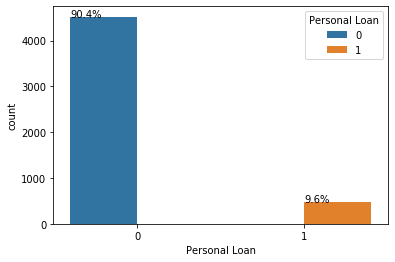

In [12]:
ax = sns.countplot(df['Personal Loan'],hue=df['Personal Loan']) # count plot to show distribution
total = len(df['Personal Loan'])
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height())) # used annotation to show the percentage of 1 and 0

### - As we have seen in the previous step there are only few cutomers accepted the personal loan offered by the bank in the last campaign.
### - we can also say that this is an imbalaced data. This can be treated using some other techniques like undersampling and over sampling but not going to do that here

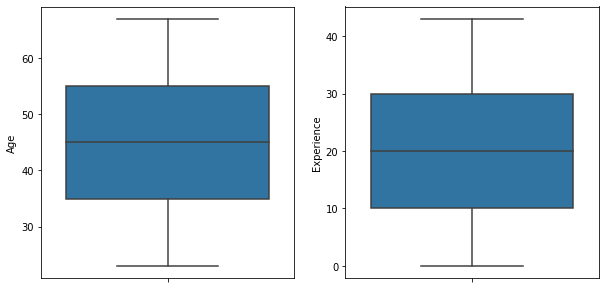

In [13]:
# trying to find the distribution of age and experience
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.boxplot(y='Age',data=df)

plt.subplot(1,2,2)
sns.boxplot(y='Experience',data=df)

plt.show()


### - Look at the two box plots, both age and experience has approx same kind of distribution as we already seen in histogram in the previous steps

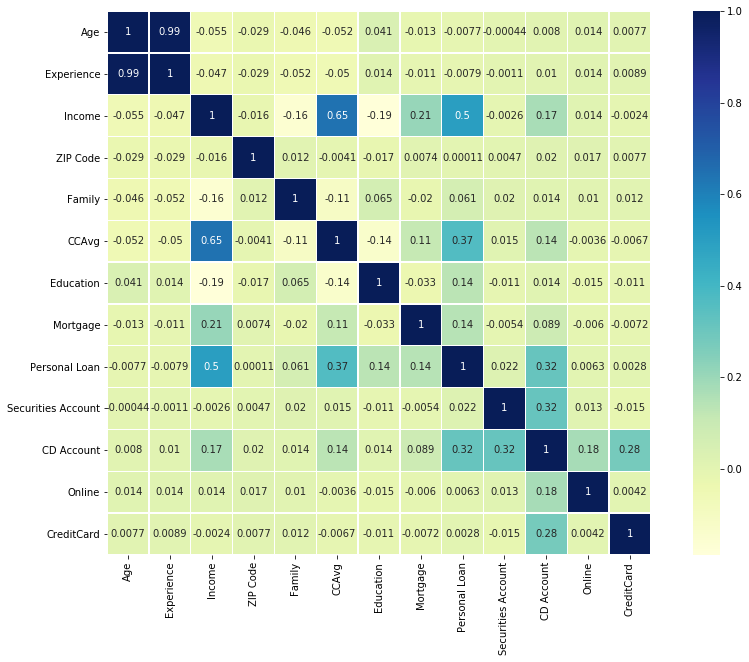

In [14]:
# checking the correlation of dataset 
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(df.corr(),cmap="YlGnBu",square=True,annot = True,linewidth=0.2)

### -  First and foremost thing is 'Multicollinearity', by looking at the heatmap we can say that 'age' and 'experience' are highly correlated to each other. 
### By knowing the experience, we can estimate the age of a person. Both the attributes have the same level significance to predict whether the customer will accept the loan offer or not
### Going forward we can remove either one of them when building the model
### we can also see that 'Zip code' is not significant as there is very low correlation to 'personal loan', so we can remove it

In [15]:
df.drop('ZIP Code',1,inplace=True) #dropping the ZIP Code column as it is not significant

## 4. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop('Personal Loan',axis=1)
Y = df['Personal Loan']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) #splitting the data into train an test


print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3500, 11)
(3500,)
(1500, 11)
(1500,)


## Normalising the data

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()  # Instantiating an object called 'scaler'

columns=['Age', 'Experience', 'Income', 'Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard']


# Fit and transform the data
x_train_scaled = scaler.fit_transform(x_train[columns])
x_test_scaled = scaler.fit_transform(x_test[columns])


# 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans (15 marks)

## a).Logistic Regression Model

In [18]:
from sklearn.linear_model import LogisticRegression

# Fit the model on train
Log_model = LogisticRegression(solver="liblinear")
Log_model.fit(x_train, y_train)

#predict on test
logistic_predict = Log_model.predict(x_test)

In [19]:
print(Log_model.score(x_train, y_train)) # checking the score of the trainset
print(Log_model.score(x_test, y_test))   # checking the score of the testset

0.9517142857142857
0.946


In [20]:
from sklearn import metrics
print(metrics.classification_report(y_test,logistic_predict))  #chcecking classification report for logistic regression

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.84      0.56      0.67       149

    accuracy                           0.95      1500
   macro avg       0.90      0.78      0.82      1500
weighted avg       0.94      0.95      0.94      1500



In [21]:
metrics.confusion_matrix(y_test,logistic_predict) # printing the confusion matrix

array([[1335,   16],
       [  65,   84]], dtype=int64)

#

## Trying using 'logit' function in Statsmodel

In [68]:
import statsmodels.api as sm

logit = sm.Logit( y_train, sm.add_constant( x_train ) )
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.126272
         Iterations 9


In [23]:
y_pred_df = pd.DataFrame( { 'actual': y_test,"predicted_prob": lg.predict( sm.add_constant( x_test ) ) } )
y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.5 else 0) 
# if the predicated probability is greater than 0.5, it is classified as 1 else 0

y_pred_df.head(10)

,actual,predicted_prob,predicted
2764,0,0.021471,0
4767,0,0.000258,0
3814,0,0.000512,0
3499,0,0.004749,0
2735,0,0.014758,0
3922,0,0.001344,0
2701,0,0.001236,0
1179,0,0.042320,0
932,0,0.345260,0
792,0,0.053609,0


In [24]:
metrics.accuracy_score( y_test, y_pred_df.predicted )

0.948

In [25]:
metrics.confusion_matrix(y_test,y_pred_df.predicted)

array([[1334,   17],
       [  61,   88]], dtype=int64)

In [26]:
print(metrics.classification_report(y_test, y_pred_df.predicted, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.84      0.59      0.69       149

    accuracy                           0.95      1500
   macro avg       0.90      0.79      0.83      1500
weighted avg       0.94      0.95      0.94      1500



### - Building the model with logit function we can balance between the recall and accuracy score using threshold. So does the recall and precision is improved for predicting ones in the dependent variable

## b. Naive Bayes Model

In [27]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes as all the attributes are numerical

# create the model
naive_model = GaussianNB()

#fit the model
naive_model.fit(x_train, y_train)

#prediction using naive bayes model
naive_predict = naive_model.predict(x_test)

In [28]:
#checkign accuracy of train and test set of naive bayes model

print("Accurcy of train set",naive_model.score(x_train,y_train))
print("Accurcy of test set",naive_model.score(x_test,y_test))

Accurcy of train set 0.89
Accurcy of test set 0.8746666666666667


In [29]:
metrics.confusion_matrix(y_test,naive_predict)

array([[1228,  123],
       [  65,   84]], dtype=int64)

In [30]:
print(metrics.classification_report(y_test,naive_predict, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.41      0.56      0.47       149

    accuracy                           0.87      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.87      0.88      1500



### We can see the recall and precision is very low for predicting 1's and 0's

#

## c. Building the model using K-Neighberhood Classifier

In [31]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score


# trying some k values for knn to check the accuracy

knn = KNeighborsClassifier(n_neighbors=3) # instantiate k=3
knn.fit(x_train, y_train)                # fitting the model
y_pred = knn.predict(x_test)            # predict the response
print('accuracy for 3 :',accuracy_score(y_test, y_pred))  # evaluate accuracy



knn = KNeighborsClassifier(n_neighbors=5) # instantiate k=5
knn.fit(x_train, y_train)                # fitting the model
y_pred1 = knn.predict(x_test)            # predict the response
print('accuracy for 5 :',accuracy_score(y_test, y_pred1))  # evaluate accuracy
 


knn = KNeighborsClassifier(n_neighbors=9) # instantiate k=9
knn.fit(x_train, y_train)                # fitting the model
y_pred2 = knn.predict(x_test)            # predict the response
print('accuracy for 9 :',accuracy_score(y_test, y_pred2))  # evaluate accuracy

accuracy for 3 : 0.904
accuracy for 5 : 0.9073333333333333
accuracy for 9 : 0.91


In [32]:
# creating odd list of 'K' for KNN


In [33]:
# empty list that will hold accuracy scores of all K's
myList = list(range(1,20,2))
neighbors = myList

accuracy_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    # predict the response
    y_pred4 = knn.predict(x_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred4)
    accuracy_scores.append(scores)

optimal_k_value = neighbors[accuracy_scores.index(max(accuracy_scores))]

print('The optimal number of neighbors(k-value) is {}'.format(optimal_k_value))

The optimal number of neighbors(k-value) is 9


In [34]:
#Use k=9 as the final model for prediction
knn = KNeighborsClassifier(n_neighbors = 9)

# fitting the model
knn.fit(x_train, y_train)

# predict the response
knn_predict = knn.predict(x_test)  

# evaluate accuracy
print(accuracy_score(y_test, knn_predict))
print(recall_score(y_test, knn_predict))

0.91
0.33557046979865773


In [35]:
metrics.confusion_matrix(y_test,knn_predict)

array([[1315,   36],
       [  99,   50]], dtype=int64)

In [36]:
print( metrics.classification_report(y_test,knn_predict, labels = [0,1]) )

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1351
           1       0.58      0.34      0.43       149

    accuracy                           0.91      1500
   macro avg       0.76      0.65      0.69      1500
weighted avg       0.90      0.91      0.90      1500



# 6. Print the confusion matrix for all the above models (5 marks)


In [37]:
 # printing the confusion matrix of logistic regression model
logistic_confusion = metrics.confusion_matrix(y_test,logistic_predict)
print(logistic_confusion)

[[1335   16]
 [  65   84]]


In [38]:
 # printing the confusion matrix of naive bayes model
naive_confusion = metrics.confusion_matrix(y_test,naive_predict)
print(naive_confusion)

[[1228  123]
 [  65   84]]


In [39]:
# printing the confusion matrix of knn model
knn_confusion = metrics.confusion_matrix(y_test,knn_predict)
print(knn_confusion)

[[1315   36]
 [  99   50]]


# 7. Give your reasoning on which is the best model in this case and why it performs better?

### By looking at the confusion matrix of all the models we can say that Logistic regression  is the better/best model in this case when we don't normalize the dataset
### As the recall and precision score of Logistic is higher followed by KNN and Naive bayes. Hence, we will conclude it is the best.

### But if we normalize the data and find the optimal 'k' value, KNN performs better than Logistic Regression (see below)

In [40]:
from sklearn.linear_model import LogisticRegression

# Fit the model on train
Log_model = LogisticRegression(solver="liblinear")
Log_model.fit(x_train_scaled, y_train)

#predict on test
logistic_predict_scaled = Log_model.predict(x_test_scaled)
logistic_confusion_scaled = metrics.confusion_matrix(y_test,logistic_predict_scaled)
print(logistic_confusion_scaled)

[[1326   25]
 [  59   90]]


In [41]:
#Use k=1 as the final model for prediction
knn = KNeighborsClassifier(n_neighbors = 1)

# fitting the model
knn.fit(x_train_scaled, y_train)

# predict the response
knn_predict_scaled = knn.predict(x_test_scaled)  

knn_confusion_scaled = metrics.confusion_matrix(y_test,knn_predict_scaled)
print(knn_confusion_scaled)

[[1328   23]
 [  37  112]]


## we can try to imrpove the accuracy or mis-classification rate by checking multicollinearity between the independent variables using VIF

#

## Multicollinearity checking using VIF(Not sure whether we can check VIF in classification but tried)

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['Features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,Age,76.84
1,Experience,30.26
5,Education,6.65
2,Income,6.52
3,Family,5.50
4,CCAvg,3.90
9,Online,2.54
10,CreditCard,1.58
8,CD Account,1.45
6,Mortgage,1.37


### - As we have seen in the previous steps the correlation of all variables in the heatmap, age and experience are having the same level of significance for predicting the dependent variable and here also we can see the VIF is high for both. So we can remove either one

In [43]:
x_train=x_train.drop(['Age',],axis=1) # dropping age as it is having high VIF
x_test=x_test.drop(['Age',],axis=1)  #dropping age column in test set also

In [44]:
# again fitting the model after removing the age column
Log_model = LogisticRegression()
Log_model.fit(x_train, y_train);

# predict on test
y_predict = Log_model.predict(x_test)

In [45]:
print(Log_model.score(x_train, y_train)) # checking the score of the trainset
print(Log_model.score(x_test, y_test))   # checking the score of the testset

0.9468571428571428
0.9433333333333334


In [46]:
## accuracy is not much improved

In [47]:
metrics.confusion_matrix(y_test,y_predict) # checking the confusion matrix 

array([[1331,   20],
       [  65,   84]], dtype=int64)

## Checking VIF after removing 'age' and building the model

In [48]:
vif=pd.DataFrame()
vif['Features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,Income,5.67
4,Education,4.36
2,Family,4.17
3,CCAvg,3.88
0,Experience,3.38
8,Online,2.35
9,CreditCard,1.52
7,CD Account,1.38
5,Mortgage,1.37
6,Securities Account,1.25


In [49]:
# VIF is okay now but 'Income' is also co-related to 'CCAvg column' so will try removing one of the column

In [50]:
x_train=x_train.drop(['CCAvg',],axis=1) #dropping the 'CCAvg' column in training set 
x_test=x_test.drop(['CCAvg',],axis=1)  #dropping the 'CCAvg' column in test set also

In [51]:
# again fitting the model after removing the CCAvg column

Log_model = LogisticRegression()
Log_model.fit(x_train, y_train)

# predict on test
y_predict = Log_model.predict(x_test)

In [52]:
# checking the accuracy
print(Log_model.score(x_train, y_train)) # checking the score of the trainset
print(Log_model.score(x_test, y_test))   # checking the score of the testset

0.9522857142857143
0.9473333333333334


In [53]:
## accuracy of the test set is slightly increased

In [54]:
metrics.confusion_matrix(y_test,y_predict)  # checking the confusion matrix 

array([[1329,   22],
       [  57,   92]], dtype=int64)

## Checking VIF after removing 'CCAvg' and building the model

In [55]:
vif=pd.DataFrame()
vif['Features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,Education,4.36
2,Family,4.17
0,Experience,3.38
1,Income,2.94
7,Online,2.35
8,CreditCard,1.52
6,CD Account,1.38
4,Mortgage,1.36
5,Securities Account,1.25


In [56]:
metrics.confusion_matrix(y_test,y_predict)

array([[1329,   22],
       [  57,   92]], dtype=int64)

In [57]:
## printing the report to know the recall and precision
print(metrics.classification_report(y_test, y_predict, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1351
           1       0.81      0.62      0.70       149

    accuracy                           0.95      1500
   macro avg       0.88      0.80      0.84      1500
weighted avg       0.94      0.95      0.94      1500



## We can say that by checking multi-collinearity between the independent variables using VIF and removing those columns having high VIF, can improve the accuracy of the models

#

# SVM Model (Optional)

In [58]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [59]:
non_linear_model = SVC(kernel='rbf',gamma=0.01,C=1000)

In [60]:
non_linear_model.fit(x_train_scaled, y_train)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [61]:
svm_predict=non_linear_model.predict(x_test_scaled)

In [62]:
print(non_linear_model.score(x_train_scaled, y_train))
print(non_linear_model.score(x_test_scaled, y_test))

0.9754285714285714
0.9733333333333334


In [63]:
metrics.confusion_matrix(y_test,svm_predict)

array([[1337,   14],
       [  26,  123]], dtype=int64)

In [64]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 3, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(x_train, y_train)  

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   13.0s finished


GridSearchCV(cv=KFold(n_splits=3, random_state=101, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [65]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.277069,0.023889,0.085726,0.016150,1,0.01,"{'C': 1, 'gamma': 0.01}",0.913453,0.916024,0.903945,0.911141,0.005195,9,0.947707,0.953279,0.952871,0.951285,0.002536
1,0.135846,0.003574,0.049848,0.016428,1,0.001,"{'C': 1, 'gamma': 0.001}",0.910026,0.920308,0.901372,0.910569,0.007740,10,0.924561,0.918131,0.929306,0.923999,0.004579
2,0.079398,0.002255,0.026112,0.004802,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.910026,0.922022,0.897084,0.909711,0.010183,12,0.910844,0.905701,0.916452,0.910999,0.004391
3,0.354048,0.028827,0.092643,0.007593,10,0.01,"{'C': 10, 'gamma': 0.01}",0.941731,0.947729,0.934820,0.941427,0.005275,6,0.986712,0.987998,0.988432,0.987714,0.000730
4,0.092252,0.004598,0.025127,0.001744,10,0.001,"{'C': 10, 'gamma': 0.001}",0.946872,0.944302,0.934820,0.941998,0.005183,5,0.968710,0.969138,0.971722,0.969857,0.001331
5,0.095344,0.017079,0.039102,0.006896,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.910883,0.922879,0.897084,0.910282,0.010539,11,0.914702,0.912988,0.919452,0.915714,0.002734
6,0.331209,0.058336,0.055241,0.008775,100,0.01,"{'C': 100, 'gamma': 0.01}",0.941731,0.941731,0.933962,0.939141,0.003662,7,0.997000,0.995714,0.997429,0.996714,0.000729
7,0.194226,0.009095,0.017095,0.002805,100,0.001,"{'C': 100, 'gamma': 0.001}",0.952871,0.954584,0.939966,0.949140,0.006525,4,0.985426,0.984998,0.985433,0.985286,0.000204
8,0.113758,0.015890,0.022460,0.002253,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.954584,0.958012,0.942539,0.951712,0.006636,3,0.959280,0.961423,0.966581,0.962428,0.003064
9,0.360168,0.023294,0.066513,0.004224,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.936590,0.934876,0.930532,0.933999,0.002550,8,0.999143,0.999571,1.000000,0.999571,0.000350


In [66]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.961140727741106 corresponding to hyperparameters {'C': 1000, 'gamma': 0.0001}


In [67]:
## Seeing above results, SVM performs better than any other classification models  (optional)